In [10]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

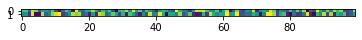

In [27]:
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
plt.imshow(points)
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndi.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

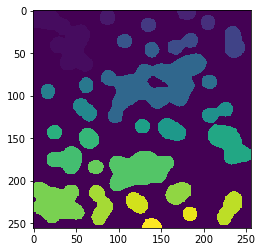

In [12]:
label_im, nb_labels = ndi.label(mask)
nb_labels
plt.imshow(label_im)

In [14]:
sizes = ndi.sum(mask, label_im, range(nb_labels + 1))
sizes

array([   0., 2706.,  268.,  220.,  242.,  241.,  697.,  556.,  241.,
        246., 4888.,  247.,  254.,  241.,  514.,  552.,  661.,  241.,
       1485.,  241.,  449.,  924., 2530.,  247., 2166.,  625.,  829.,
        735.,  484.,  243.,  215.])

In [16]:
mean_vals = ndi.sum(im, label_im, range(1, nb_labels + 1))
mean_vals

array([ 9.77742383,  0.69344308,  0.79863778,  0.61158314,  0.60857917,
        2.41968888,  1.39212842,  0.60830618,  0.61900393, 17.76734948,
        0.62082653,  0.63536207,  0.60824185,  1.47880833,  1.39170619,
        2.46310716,  0.60895013,  6.29904052,  0.60833239,  1.58474498,
        3.31717402,  9.84953862,  0.62128351,  6.05005345,  2.51743258,
        2.25695918,  2.38540169,  1.52613083,  0.6128717 ,  0.80512403])

In [17]:
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
remove_pixel.shape

(256, 256)

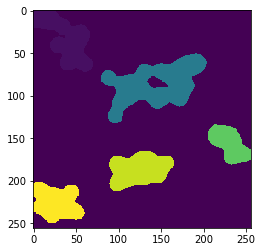

In [18]:
label_im[remove_pixel] = 0
plt.imshow(label_im)

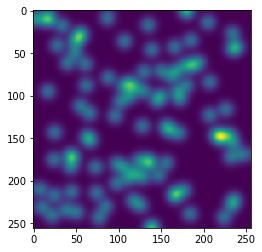

In [26]:
slice_x, slice_y = ndi.find_objects(label_im==0)[0]
roi = im[slice_x, slice_y]
plt.imshow(roi)   